# Assignment-6

# Problem Statement 1: 
Load the 'content/titanic.csv' dataset into a DataFrame and perform the
following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna()
function
2. Considering the 'Survived' column as the target, separate the target variable from the
independent variables
3. Select only the numeric columns from the input variables
4. Split the data into five folds using KFold() function
5. Build a decision tree classifier model and print model accuracies for all the data folds
6. Find the accuracies of the model for all the folds using a cross validator and compare the
accuracies with the model accuracies

In [764]:
import pandas as pd

In [765]:
!wget https://www.dropbox.com/s/8vptwyquvk9oppy/titanic.csv

--2022-08-03 09:23:26--  https://www.dropbox.com/s/8vptwyquvk9oppy/titanic.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8vptwyquvk9oppy/titanic.csv [following]
--2022-08-03 09:23:26--  https://www.dropbox.com/s/raw/8vptwyquvk9oppy/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2883ceb5be96cedb2e7ac139d6.dl.dropboxusercontent.com/cd/0/inline/BqSuiyK3XJpOpZz6UXH1-HYQJ_FB-U_LYkF8YtgedDLdhqLkRCOcxqTkoKeXV4oJRxqfLReJ7UFjASMFsTMbubRazSQROXRGeCPoS1JaCPQLA_J-Tkbzwp_bvoHa50KcNkJgjpfITS83fK5sZ0YuJKMLW1_Mj0aYmd6gcK_IPwH-Aw/file# [following]
--2022-08-03 09:23:26--  https://uc2883ceb5be96cedb2e7ac139d6.dl.dropboxusercontent.com/cd/0/inline/BqSuiyK3XJpOpZz6UXH1-HYQJ_FB-U_LYkF8YtgedDLdhqLkRCOcxqTkoKeXV4oJRxqfLRe

In [766]:
titanic_data=pd.read_csv("/content/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [767]:
titanic_data.shape

(891, 12)

In [768]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [769]:
#Dropping  the “Cabin” column from the data frame as it won’t be of much importance
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [770]:
#Replacing the missing values in the “Age” column with the mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [771]:
#Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [772]:
#Replacing the missing values in the “Embarked” column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [773]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [774]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [775]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [776]:
titanic_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


Text(0.5, 1.0, 'Pair Plot')

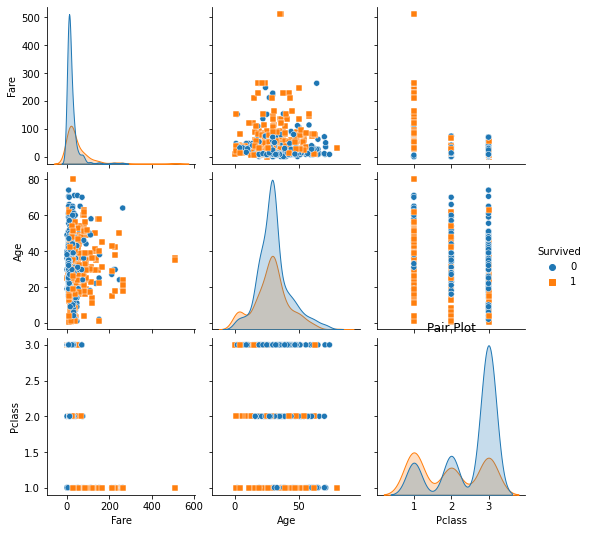

In [777]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(titanic_data[["Fare","Age","Pclass","Survived"]],vars = ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

Text(0.5, 1.0, 'Correlation between features')

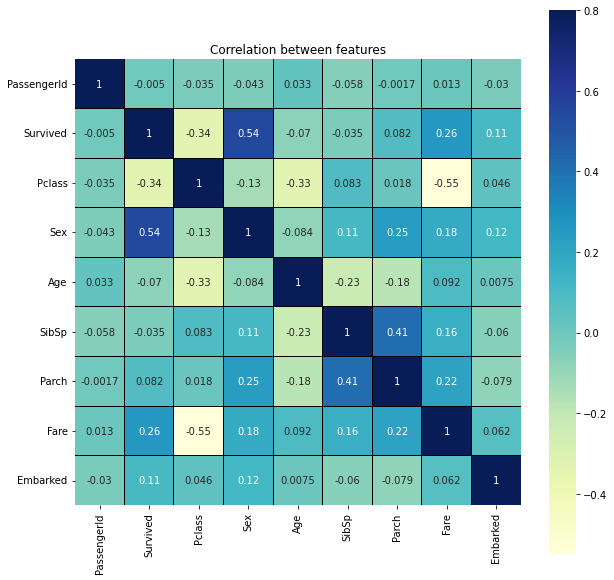

In [778]:
corr = titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

In [779]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = titanic_data['Survived']

In [780]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [781]:
import warnings
warnings.filterwarnings("ignore")

In [782]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [783]:
model =DecisionTreeClassifier()

In [784]:
kf = KFold(n_splits=5)
# len(kf)
print(kf)  
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model = model.fit(X_train, y_train)
  predicted_value = model.predict(X_test)
  print("accuracy fold =",accuracy_score(y_test,predicted_value))



KFold(n_splits=5, random_state=None, shuffle=False)
accuracy fold = 0.7374301675977654
accuracy fold = 0.7865168539325843
accuracy fold = 0.8089887640449438
accuracy fold = 0.7696629213483146
accuracy fold = 0.8089887640449438


In [785]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9817671809256662


In [786]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8089887640449438


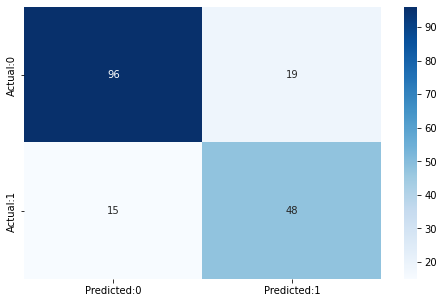

In [787]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,X_test_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Blues')

# Problem Statement 3:
 Load the ‘voice.csv’ dataset into a DataFrame and perform the following
tasks:
1. Considering the ‘label’ column as the target variable, rename the column as
‘Gender_Identified’
2. Using the preprocessing() function, label the target column
3. Separate the target variable and the feature vectors
4. Build a RandomForestClassifier model and find the best parameters using a Grid search
5. Print the best parameters and the best estimator

In [788]:
import pandas as pd

In [789]:
!wget https://www.dropbox.com/s/6debd94c2atwxi6/voice.csv

--2022-08-03 09:23:36--  https://www.dropbox.com/s/6debd94c2atwxi6/voice.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6debd94c2atwxi6/voice.csv [following]
--2022-08-03 09:23:36--  https://www.dropbox.com/s/raw/6debd94c2atwxi6/voice.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5dd5b8b6092ec0704ab56b39ed.dl.dropboxusercontent.com/cd/0/inline/BqTt2Lua4PDlKmfQdx2W1sDhfNoWOWVzgCr7xw3uVvmbVwvLfqsQVsf_JRgwERdUxkoKKITuJaxPVvnvoB0cXemlslg9V1LOikKQjih7W5tKRe8AiQZfBlhpkTP6H05G0QZZLPTNVHYLqM9xPUqc_0Egq9xFSw34afhf3PpKivKvFQ/file# [following]
--2022-08-03 09:23:37--  https://uc5dd5b8b6092ec0704ab56b39ed.dl.dropboxusercontent.com/cd/0/inline/BqTt2Lua4PDlKmfQdx2W1sDhfNoWOWVzgCr7xw3uVvmbVwvLfqsQVsf_JRgwERdUxkoKKITuJaxPV

In [790]:
vf=pd.read_csv("voice.csv")

In [791]:
vf.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [792]:
vf.shape

(3168, 21)

In [793]:
vf.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [794]:
#Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’
vf.rename(columns = {'label':'Gender_Identified'}, inplace = True)
vf.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [795]:
#Using the preprocessing() function, label the target column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
vf['Gender_Identified']=le.fit_transform(vf['Gender_Identified'])
vf.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [796]:
X= vf.drop(['Gender_Identified'],axis=1)
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [797]:
y=vf['Gender_Identified']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender_Identified, dtype: int64

In [798]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [799]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() #sc = standard scaler variable 
X_train = sc.fit_transform(X_train)#only apply feature scaling to numerical values 
X_test = sc.transform(X_test)

In [800]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=0)

rfclf.fit(X_train,y_train)
rfclf.score(X_test,y_test)

0.9705573080967402

In [801]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' : [10,15,20], 'max_depth' : [3,5,8],'criterion' : ["gini", "entropy"]}
rfclf = RandomForestClassifier()
gridCV = GridSearchCV(estimator=rfclf,
                    param_grid=params,
                    scoring='accuracy',
                    cv=4)

In [802]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8], 'n_estimators': [10, 15, 20]},
             scoring='accuracy')

In [803]:
gridCV.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__bootstrap', 'estimator__ccp_alpha', 'estimator__class_weight', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__max_samples', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_jobs', 'estimator__oob_score', 'estimator__random_state', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [804]:
gridCV.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator': RandomForestClassifier(),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': [3, 5, 8],
  'n_estimators': [10, 15, 20]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [805]:
gridCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 20}

In [806]:
gridCV.best_score_

0.9760911633655316

In [807]:
gridCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=20)

#Problem Statement 2: 
Load Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and
perform the following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna()
function
2. Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the
LabelEncoder()
3. Separate the target variable and the feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and
RandomForestClassifier models; Also, print their accuracies
6. Calculate the ROC_AUC score based on the False Positive Rate (FPR) and True Positive
Rate (TPR)
7. Plot the ROC Curve using the Matplotlib library
8. Calculate the F1 Score
9. Calculate and Print the Precision, Recall, and F1 score using the classification_report()
function

Hint: You can declare the algorithms in a list and iterate through them to build their respective
models and calculate their accuracies using a for loop.

In [808]:
!wget https://www.dropbox.com/s/teoakad7k4twe3o/Breast_Cancer_Dataset.csv

--2022-08-03 09:23:43--  https://www.dropbox.com/s/teoakad7k4twe3o/Breast_Cancer_Dataset.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/teoakad7k4twe3o/Breast_Cancer_Dataset.csv [following]
--2022-08-03 09:23:43--  https://www.dropbox.com/s/raw/teoakad7k4twe3o/Breast_Cancer_Dataset.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca14dd5c15dcb76c3379f9e82f3.dl.dropboxusercontent.com/cd/0/inline/BqTORKf60TydtRVwLGKnAOsfMtIj1vPXI0yyqZtDUnsJto4q97WkLr4dRjPpyqC4fRvwGq8hP1S9S_cPhRWVzlFc7rLaH10P2ad3OkMc7BWwQdi50NVSEBGyxUtw1CUVSwe77kmMI8ARkBwvSy1PjKbDNN4hr_bMfSQ9ZiiNENE2Dg/file# [following]
--2022-08-03 09:23:43--  https://uca14dd5c15dcb76c3379f9e82f3.dl.dropboxusercontent.com/cd/0/inline/BqTORKf60TydtRVwLGKnAOsfMtIj1

In [809]:
Breast_cancer=pd.read_csv("Breast_Cancer_Dataset.csv")

In [810]:
Breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [811]:
# counting values of variables in 'diagnosis'
Breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

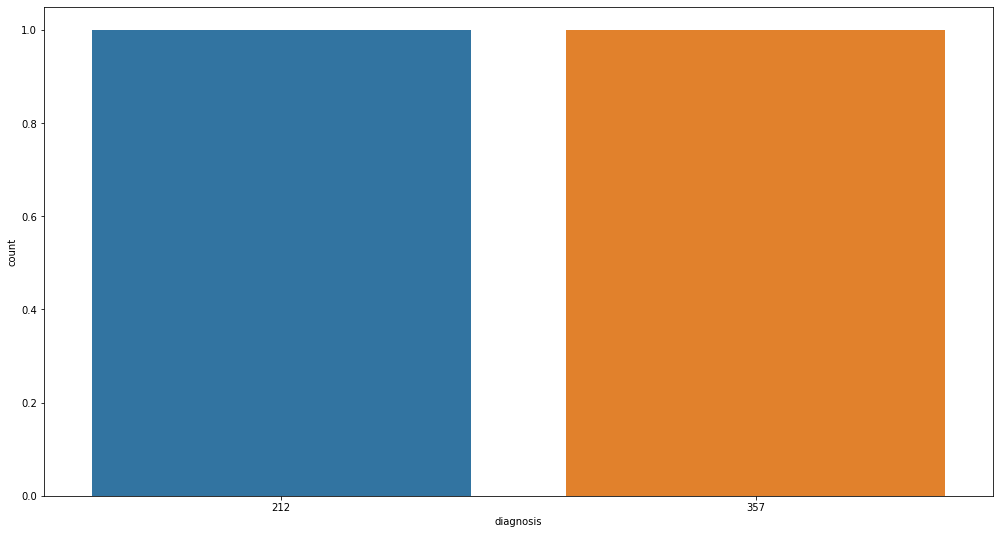

In [812]:
plt.figure(figsize=[17,9])
sns.countplot(Breast_cancer['diagnosis'].value_counts())
plt.show()

In [813]:
Breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [814]:
#droping feature
Breast_cancer.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [815]:
# independent variables
X = Breast_cancer.drop('diagnosis',axis=1)
#dependent variables
y = Breast_cancer.diagnosis

In [816]:
from sklearn.preprocessing import LabelEncoder
#creating the object
lb = LabelEncoder()
y = lb.fit_transform(y)

In [817]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [818]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [819]:
#create a function for models
def models(X_train, y_train):
   #log regression
   from sklearn.linear_model import LogisticRegression
   log= LogisticRegression(random_state=0)
   log.fit(X_train,y_train)

   #Naive Bayes Classifier
   from sklearn.naive_bayes import GaussianNB
   nb_classifier = GaussianNB()
   nb_classifier.fit(X_train, y_train)

   # Decision Tree Classifier
   from sklearn.tree import DecisionTreeClassifier
   dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
   dt_classifier.fit(X_train, y_train)

   # K – Nearest Neighbor Classifier
   from sklearn.neighbors import KNeighborsClassifier
   knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
   knn_classifier.fit(X_train, y_train)

   # Support vector classifier
   from sklearn.svm import SVC
   svc_classifier = SVC()
   svc_classifier.fit(X_train, y_train)

   # Random Forest Classifier
   from sklearn.ensemble import RandomForestClassifier
   rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 51)
   rf_classifier.fit(X_train, y_train)

   from sklearn.metrics import  accuracy_score

   print("training data accuracy")
   print('[0]Logistic regression training accuracy:',log.score(X_train, y_train))
   print('[1]Naive Bayes Classifier training accuracy:',nb_classifier.score(X_train, y_train))
   print('[2]DecisionTreeClassifier training accuracy:',dt_classifier.score(X_train, y_train))
   print('[3]knn_classifier training accuracy:',knn_classifier.score(X_train, y_train))
   print('[4]Support vector classifier training accuracy:',svc_classifier.score(X_train, y_train))
   print('[5]RandomForestClassifier training accuracy:',rf_classifier.score(X_train, y_train))

   print("test data accuracy")
   print('[0]Logistic regression test data accuracy:',accuracy_score(y_test, log.predict(X_test)))
   print('[1]Naive Bayes Classifier test data accuracy:',accuracy_score(y_test, nb_classifier.predict(X_test)))
   print('[2]DecisionTreeClassifier test data accuracy:',accuracy_score(y_test, dt_classifier.predict(X_test)))
   print('[3]knn_classifier test data accuracy:',accuracy_score(y_test, knn_classifier.predict(X_test)))
   print('[4]Support vector classifier test data accuracy:',accuracy_score(y_test, svc_classifier.predict(X_test)))
   print('[5]RandomForestClassifier test data accuracy:',accuracy_score(y_test, rf_classifier.predict(X_test)))

   return log,nb_classifier,dt_classifier,knn_classifier,svc_classifier,rf_classifier


In [820]:
model=models(X_train, y_train)

training data accuracy
[0]Logistic regression training accuracy: 0.9874371859296482
[1]Naive Bayes Classifier training accuracy: 0.9396984924623115
[2]DecisionTreeClassifier training accuracy: 1.0
[3]knn_classifier training accuracy: 0.9798994974874372
[4]Support vector classifier training accuracy: 0.9899497487437185
[5]RandomForestClassifier training accuracy: 0.9974874371859297
test data accuracy
[0]Logistic regression test data accuracy: 0.9766081871345029
[1]Naive Bayes Classifier test data accuracy: 0.9649122807017544
[2]DecisionTreeClassifier test data accuracy: 0.9473684210526315
[3]knn_classifier test data accuracy: 0.9707602339181286
[4]Support vector classifier test data accuracy: 0.9883040935672515
[5]RandomForestClassifier test data accuracy: 0.9590643274853801


In [821]:
rf_classifier=RandomForestClassifier()
# Fit the model to the training data
rf_classifier.fit(X_train, y_train)
# Predict the classes on the test data
y_pred =rf_classifier.predict(X_test)
y_proba =rf_classifier.predict_proba(X_test)


In [822]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = model.predict_proba(X_test)
preds = y_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.9845496894409939

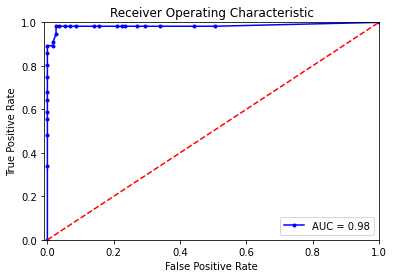

In [841]:
# plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',marker='.', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#plot_sklearn_roc_curve(y_test, y_proba[:, 1])

In [824]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9649122807017544

In [825]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       115
           1       0.95      0.98      0.96        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



In [826]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf_classifier.predict(X_test))

array([[112,   3],
       [  1,  55]])

# Problem Statement 4: 
The ‘seeds.csv’ dataset contains the data about the wheat seeds, the
‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on the
charecterstics of seeds entailing in other columns.
Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks:
1. Considering the 'Type' column as target, analyze the target column by printing the
unique values
2. Separate the feature vectors and the target variable
3. Split the dataset into train and test sets in a 70:30 ratio
4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA
Boost Classifier and compare the accuracy scores with original models using a bar plot


In [827]:
!wget https://www.dropbox.com/s/lcy0ljpep05wspa/seeds.csv

--2022-08-03 09:23:45--  https://www.dropbox.com/s/lcy0ljpep05wspa/seeds.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lcy0ljpep05wspa/seeds.csv [following]
--2022-08-03 09:23:45--  https://www.dropbox.com/s/raw/lcy0ljpep05wspa/seeds.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc45f54eb24f660459a282d87600.dl.dropboxusercontent.com/cd/0/inline/BqQmWma5T0fLekHEinm8-FZ8wih61URLNAzla1Pih-KFH-vpNu7lvHQTDImZh1_L7kgS6Tn8TAmITnIzJObDDk0ybhkIvQraaxTdIVY1taMw5uuuupOR0gX93aIJ3ERPx4E2TPMQ4D9TNroEw15Kg793bd3D5453ApX9uOhAObpCNQ/file# [following]
--2022-08-03 09:23:45--  https://uc45f54eb24f660459a282d87600.dl.dropboxusercontent.com/cd/0/inline/BqQmWma5T0fLekHEinm8-FZ8wih61URLNAzla1Pih-KFH-vpNu7lvHQTDImZh1_L7kgS6Tn8TAmIT

In [828]:
seed=pd.read_csv('seeds.csv')
seed.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [829]:
seed.Type.unique()

array([1, 2, 3])

In [830]:
a=[]
a1=0
a2=0
a3=0
for i in seed.Type:
  if i==1:
    a1+=1
  elif i==2:
    a2+=1
  else:
    a3+=1
a.append([a1,a1/len(seed.Type)])
a.append([a2,a2/len(seed.Type)])
a.append([a3,a3/len(seed.Type)])

In [831]:
new=pd.DataFrame(a,columns=["Counts","Percentage"],index=[1,2,3])
new

,Counts,Percentage
1,66,0.331658
2,68,0.341709
3,65,0.326633


In [832]:
X=seed.drop(columns="Type")
y=seed.Type

In [833]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [834]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
decision_tree=accuracy_score(y_test,y_pred)

In [835]:
gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
Gussian_NB=accuracy_score(y_test,y_pred)

In [836]:
from sklearn.ensemble import AdaBoostClassifier

In [837]:
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=50)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
ADA_boost_decision_tree=accuracy_score(y_test,pred)

In [838]:
ada = AdaBoostClassifier(base_estimator=gb,n_estimators=50,)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
ADA_boost_Gussian_NB=accuracy_score(y_test,pred)

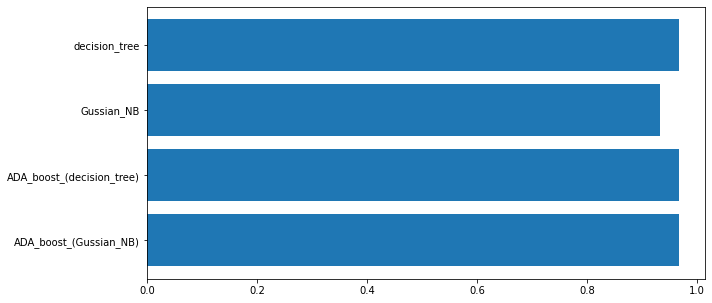

In [839]:
data={"ADA_boost_(Gussian_NB)":ADA_boost_Gussian_NB,"ADA_boost_(decision_tree)":ADA_boost_decision_tree,"Gussian_NB":Gussian_NB,"decision_tree":decision_tree}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize=(10, 5))
  
# creating the bar plot
plt.barh(courses, values)
plt.show()